### Data Set Enfermedades Cardiacas

El campo "objetivo" se refiere a la presencia de enfermedad cardíaca en el paciente. Tiene un valor entero 0 = sin enfermedad y 1 = enfermedad.

| **target** | Diagnóstico de enfermedad cardíaca | Binario | 0 = No enfermedad, 1 = Enfermedad |

## Variables del Dataset Cardíaco

| Nombre Variable | Descripción | Tipo de Dato | Valores/Rango |
|-----------------|-------------|--------------|---------------|
| **edad** | Edad del paciente | Entero | Edad en años |
| **sexo** | Género del paciente | Binario | 1 = Hombre, 0 = Mujer |
| **cp** | Tipo de dolor torácico | Categórico | 1 = Angina típica<br>2 = Angina atípica<br>3 = Dolor no anginoso<br>4 = Asintomático |
| **trestbps** | Presión arterial en reposo | Continuo | mm Hg |
| **chol** | Colesterol sérico | Continuo | mg/dl |
| **fbs** | Glucemia en ayunas | Binario | 1 = >120 mg/dl, 0 = ≤120 mg/dl |
| **restecg** | Resultados electrocardiográficos en reposo | Categórico | 0 = Normal<br>1 = Anomalía ST-T<br>2 = Hipertrofia ventricular |
| **thalach** | Frecuencia cardíaca máxima alcanzada | Entero | Latidos por minuto |
| **exang** | Angina inducida por ejercicio | Binario | 1 = Sí, 0 = No |
| **oldpeak** | Depresión del segmento ST inducida por ejercicio | Continuo | Medido en mm |
| **slope** | Pendiente del segmento ST en ejercicio máximo | Categórico | 1 = Ascendente<br>2 = Plana<br>3 = Descendente |
| **ca** | Número de vasos principales coloreados | Entero | 0-3 |
| **thal** | Resultado del test de talio | Categórico | 0 = Normal<br>1 = Defecto fijo<br>2 = Defecto reversible |
| **target** | Diagnóstico de enfermedad cardíaca | Binario | 0 = No enfermedad, 1 = Enfermedad |


Importar Librerias

In [3]:
#loading dataset
import pandas as pd
import numpy as np
#visualisation
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
#EDA
from collections import Counter
import ydata_profiling as pp
# data preprocessing
from sklearn.preprocessing import StandardScaler
# data splitting
from sklearn.model_selection import train_test_split
# data modeling
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
#from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
#ensembling
#from mlxtend.classifier import StackingCVClassifier

Cargar Archivo

In [6]:
# Cargamos la base de datos 'heart.csv'
heart = pd.read_csv(r'C:\Users\Dc\Documents\Maestría_Data_Science\Fundamentos_IA\Data_Sets\heart.csv')
#showing the first rows 
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


EDA

In [10]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [11]:
heart.shape
#showing the columns of the dataset

(1025, 14)

In [12]:
heart.columns   
#showing the data types of the columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [13]:
#showing the data types of the columns
heart.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [14]:
#showing the number of null values in each column
heart.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [15]:
heart.nunique()
#showing the statistical summary of the dataset

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

In [16]:
heart.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Modelo Random Forest

In [17]:
# Dividir datos en características (X) y objetivo (y)
X = heart.drop('target', axis=1)  # Asumiendo que 'target' es la variable objetivo
y = heart['target']

In [18]:
# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [19]:
# Crear y entrenar el modelo Random Forest
rf_model = RandomForestClassifier(n_estimators=100, 
                                max_depth=5, 
                                random_state=42,
                                class_weight='balanced')  # Útil si hay desbalance de clases

rf_model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=5, random_state=42)

In [ ]:
# Evaluar el modelo
y_pred = rf_model.predict(X_test)

print("\nPrecisión del modelo:", accuracy_score(y_test, y_pred))
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))


Precisión del modelo: 0.8928571428571429

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.93      0.86      0.89       159
           1       0.86      0.93      0.89       149

    accuracy                           0.89       308
   macro avg       0.89      0.89      0.89       308
weighted avg       0.90      0.89      0.89       308



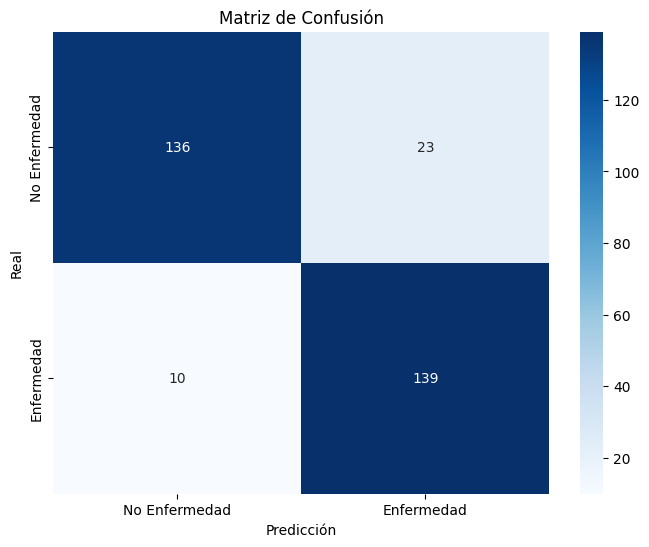

In [21]:
# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No Enfermedad', 'Enfermedad'],
            yticklabels=['No Enfermedad', 'Enfermedad'])
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.show()

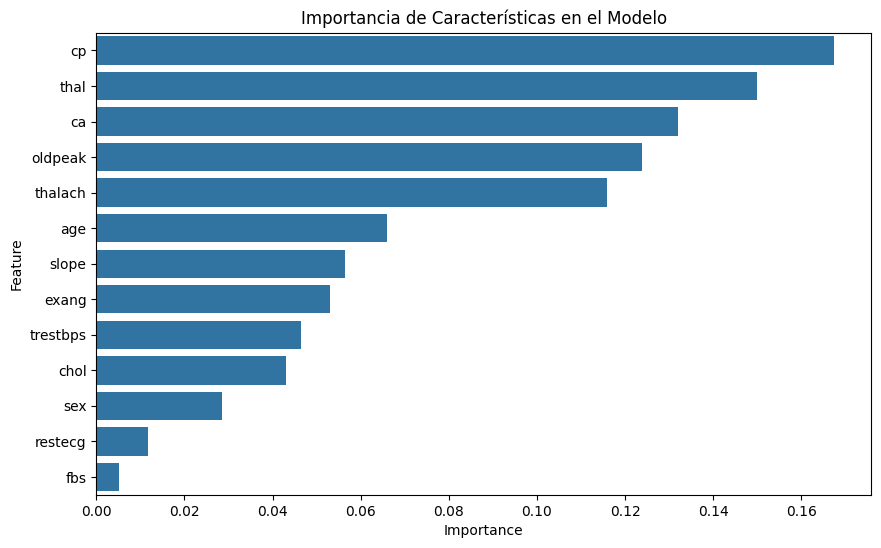

In [22]:
# 8. Importancia de características
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Importancia de Características en el Modelo')
plt.show()

Importar el Modelos PKL

In [25]:
from sklearn.ensemble import RandomForestClassifier
from joblib import dump

# Entrenar el modelo Random Forest
clf = RandomForestClassifier(n_estimators=10)
clf.fit(X, y)

# Guardar el modelo en un archivo .pkl
dump(clf, 'modelo_random.pkl')

['modelo_random.pkl']

In [26]:
import joblib
# Ejemplo con datos de un nuevo paciente
nuevos_datos = pd.DataFrame({
    'age': [58],  # Edad
    'sex': [1],    # 1 = masculino, 0 = femenino
    'cp': [2],     # Tipo de dolor torácico (1-4)
    'trestbps': [140],  # Presión arterial
    'chol': [240], # Colesterol
    'fbs': [0],    # Glucemia en ayunas (0/1)
    'restecg': [1],# Resultados ECG
    'thalach': [150], # Frecuencia cardíaca máxima
    'exang': [0],  # Angina inducida (0/1)
    'oldpeak': [1.2], # Depresión ST
    'slope': [2],  # Pendiente ST
    'ca': [1],     # Vasos principales (0-3)
    'thal': [2]    # Thal
})

# Asegurar mismo orden de columnas
nuevos_datos = nuevos_datos[X.columns]

In [28]:
prediccion = rf_model.predict(nuevos_datos)
probabilidad = rf_model.predict_proba(nuevos_datos)

print(f"Predicción: {'Enfermedad cardíaca' if prediccion[0] == 1 else 'Sin enfermedad'}")
print(f"Probabilidad: {probabilidad[0][1]*100:.2f}% de tener enfermedad cardíaca")

Predicción: Enfermedad cardíaca
Probabilidad: 61.19% de tener enfermedad cardíaca


In [29]:
# Datos para varios pacientes (ejemplo)
pacientes = pd.DataFrame([
    [65, 1, 3, 120, 200, 0, 0, 130, 0, 0.0, 1, 0, 1],  # Paciente 1
    [45, 0, 2, 140, 280, 1, 1, 160, 1, 2.3, 2, 2, 2]   # Paciente 2
], columns=X.columns)

# Predicciones batch
predicciones = rf_model.predict(pacientes)
probabilidades = rf_model.predict_proba(pacientes)[:, 1]

resultados = pacientes.copy()
resultados['Prediccion'] = ['Enfermedad' if p == 1 else 'Sano' for p in predicciones]
resultados['Probabilidad'] = [f"{p*100:.1f}%" for p in probabilidades]

print("\nResultados para múltiples pacientes:")
print(resultados[['age', 'sex', 'Prediccion', 'Probabilidad']])


Resultados para múltiples pacientes:
   age  sex  Prediccion Probabilidad
0   65    1  Enfermedad        68.7%
1   45    0  Enfermedad        62.3%


In [30]:
import joblib
import pandas as pd

def cargar_modelo(ruta_modelo="modelo_random.pkl"):
    """Carga el modelo entrenado desde un archivo .pkl"""
    try:
        modelo = joblib.load(ruta_modelo)
        print("Modelo cargado exitosamente")
        return modelo
    except FileNotFoundError:
        print(f"Error: No se encontró el archivo {ruta_modelo}")
        return None
    except Exception as e:
        print(f"Error al cargar el modelo: {str(e)}")
        return None

def predecir_enfermedades_cardiacas(modelo):
    """Realiza predicciones sobre datos de pacientes"""
    # Datos de ejemplo para múltiples pacientes
    datos_pacientes = [
        [65, 1, 3, 120, 200, 0, 0, 130, 0, 0.0, 1, 0, 1],  # Paciente 1
        [45, 0, 2, 140, 280, 1, 1, 160, 1, 2.3, 2, 2, 2]    # Paciente 2
    ]
    
    # Columnas correspondientes a las características del modelo
    columnas = [
        'age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
        'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal'
    ]
    
    try:
        # Crear DataFrame con los datos
        pacientes = pd.DataFrame(datos_pacientes, columns=columnas)
        
        # Realizar predicciones
        predicciones = modelo.predict(pacientes)
        probabilidades = modelo.predict_proba(pacientes)[:, 1] * 100  # Convertir a porcentaje
        
        # Añadir resultados al DataFrame
        resultados = pacientes.copy()
        resultados['Predicción'] = ['Enfermedad' if p == 1 else 'Sano' for p in predicciones]
        resultados['Probabilidad (%)'] = probabilidades.round(2)
        
        return resultados
    
    except Exception as e:
        print(f"Error al realizar predicciones: {str(e)}")
        return None

if __name__ == "__main__":
    # Paso 1: Cargar el modelo
    modelo = cargar_modelo()
    
    if modelo is not None:
        # Paso 2: Realizar predicciones
        resultados = predecir_enfermedades_cardiacas(modelo)
        
        if resultados is not None:
            print("\nRESULTADOS DE PREDICCIÓN PARA PACIENTES")
            print("---------------------------------------")
            # Mostrar solo las columnas más relevantes para el reporte
            print(resultados[['age', 'sex', 'Predicción', 'Probabilidad (%)']])

Modelo cargado exitosamente

RESULTADOS DE PREDICCIÓN PARA PACIENTES
---------------------------------------
   age  sex  Predicción  Probabilidad (%)
0   65    1  Enfermedad              90.0
1   45    0  Enfermedad              70.0
